In [31]:
import rasterio
import geopandas as gpd
import pyproj
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import lightgbm as lgbm
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from numpy import *
import numpy as np

In [32]:
path = 'C:/Users/Rasmu/Documents/Thesis/Hardangervidda/Training_Data/'
#path = 'C://Users/rasmu/Documents/Thesis/Hardangervidda/Dates/20200306/sampled/SD.shp'

In [33]:
df = gpd.read_file(path)

In [34]:
df

,SD,VH,VV,Ratio,Subtract,DEM,geometry
0,1.290,-19.101095,-9.513816,2.007722,-9.587280,1231.519775,POINT (134427.679 6706439.593)
1,1.230,-18.927411,-9.423685,2.008494,-9.503726,1232.778076,POINT (134407.215 6706342.141)
2,1.230,-18.688510,-9.146005,2.043352,-9.542505,1253.882812,POINT (134376.982 6706194.872)
3,1.080,-18.688510,-9.146005,2.043352,-9.542505,1253.882812,POINT (134376.982 6706194.872)
4,1.190,-18.352802,-8.707393,2.107726,-9.645409,1233.755981,POINT (134333.910 6705988.237)
...,...,...,...,...,...,...,...
3983,2.200,-16.325642,-8.531227,1.913634,-7.794415,1416.630737,POINT (34637.134 6683936.228)
3984,2.320,-16.059727,-7.884479,2.036879,-8.175248,1416.958252,POINT (34621.056 6683867.939)
3985,2.485,-16.059727,-7.884479,2.036879,-8.175248,1416.958252,POINT (34621.056 6683867.939)
3986,2.500,-14.470350,-5.588511,2.589303,-8.881839,1329.847168,POINT (34522.123 6683447.507)


(800.0, 1600.0)

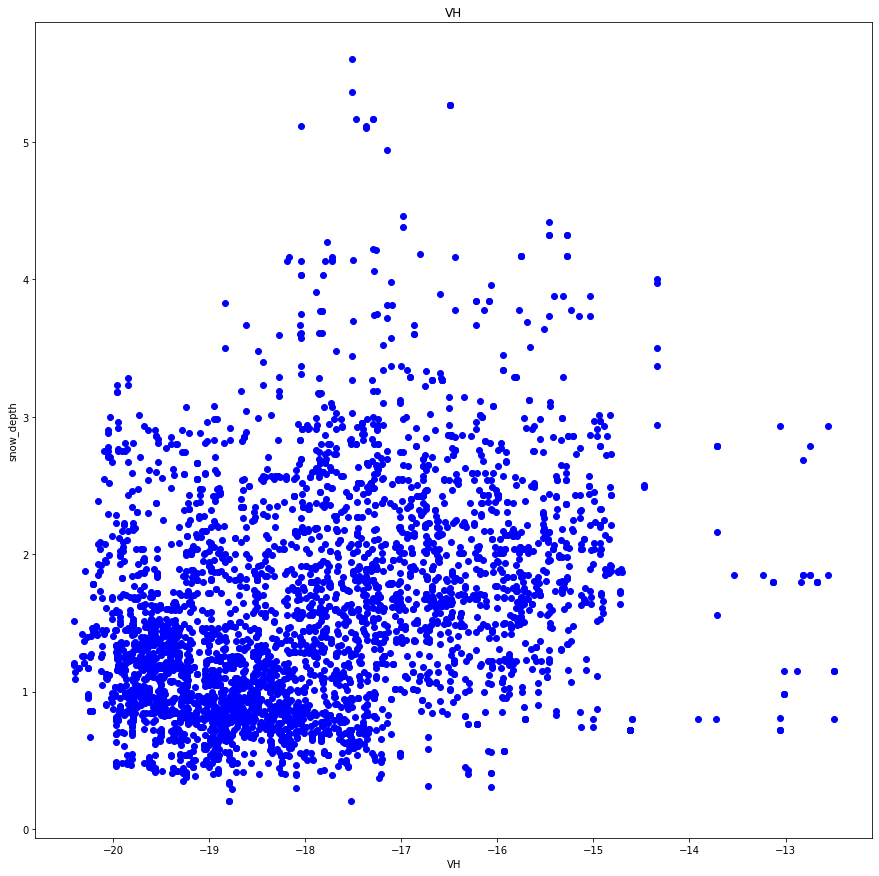

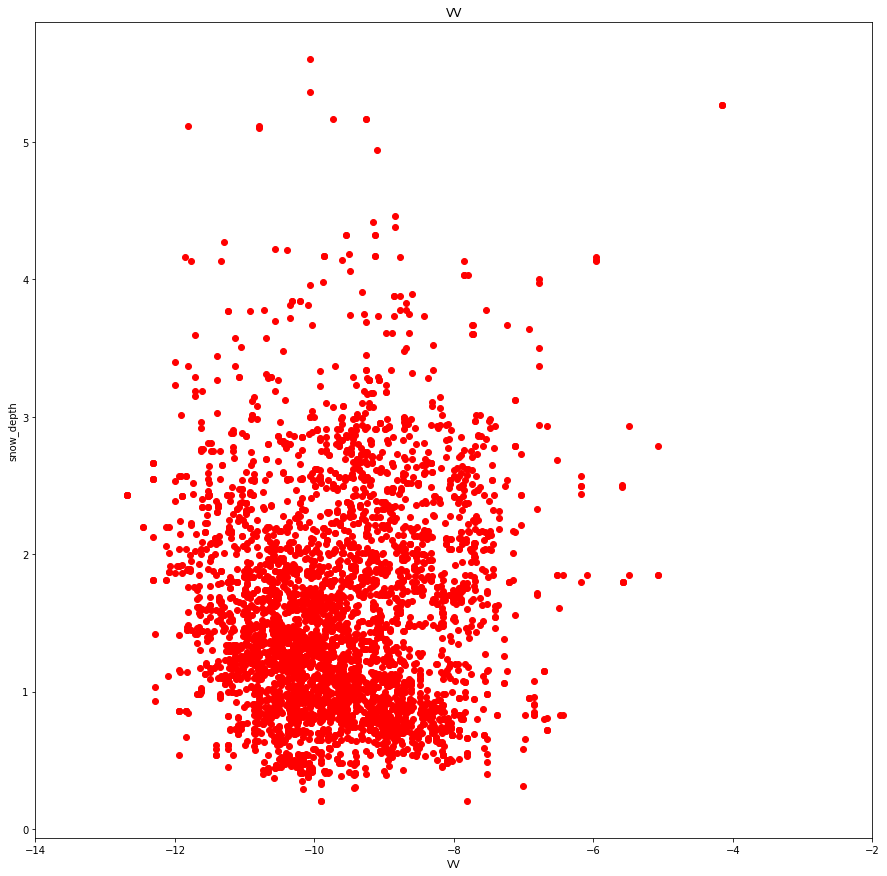

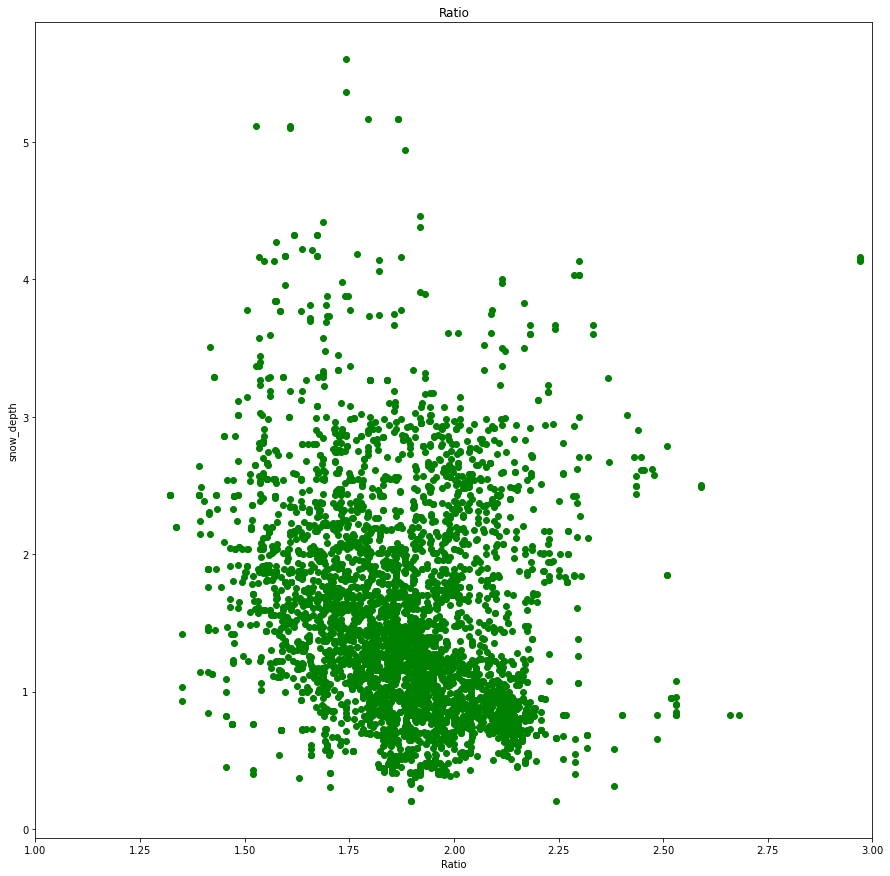

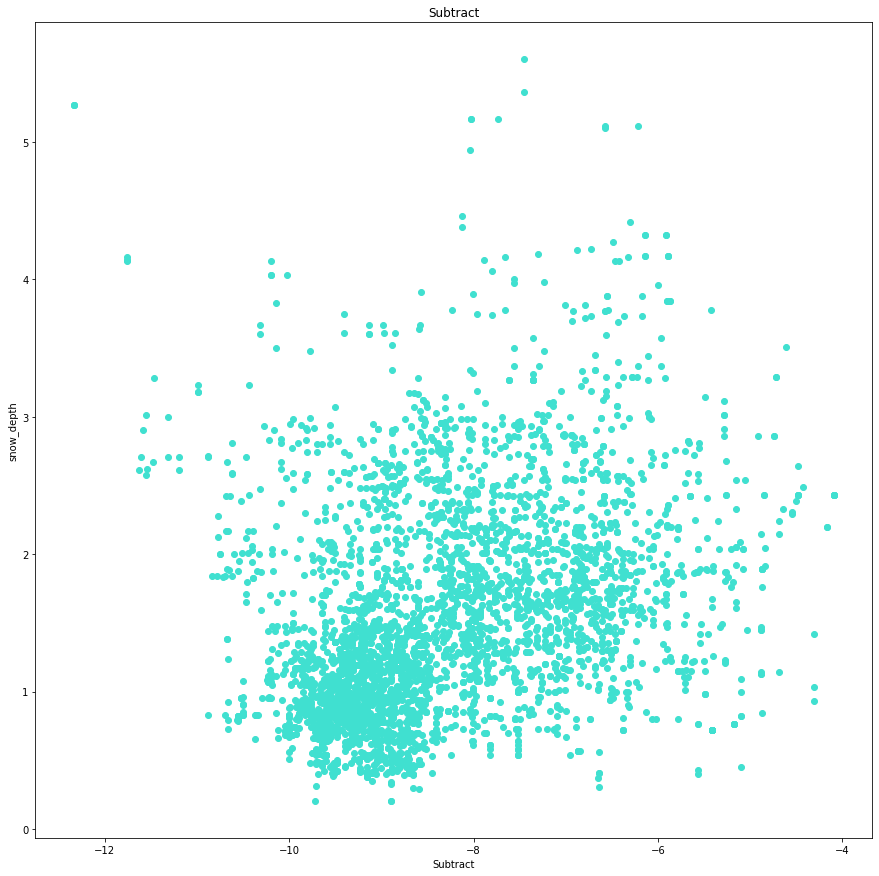

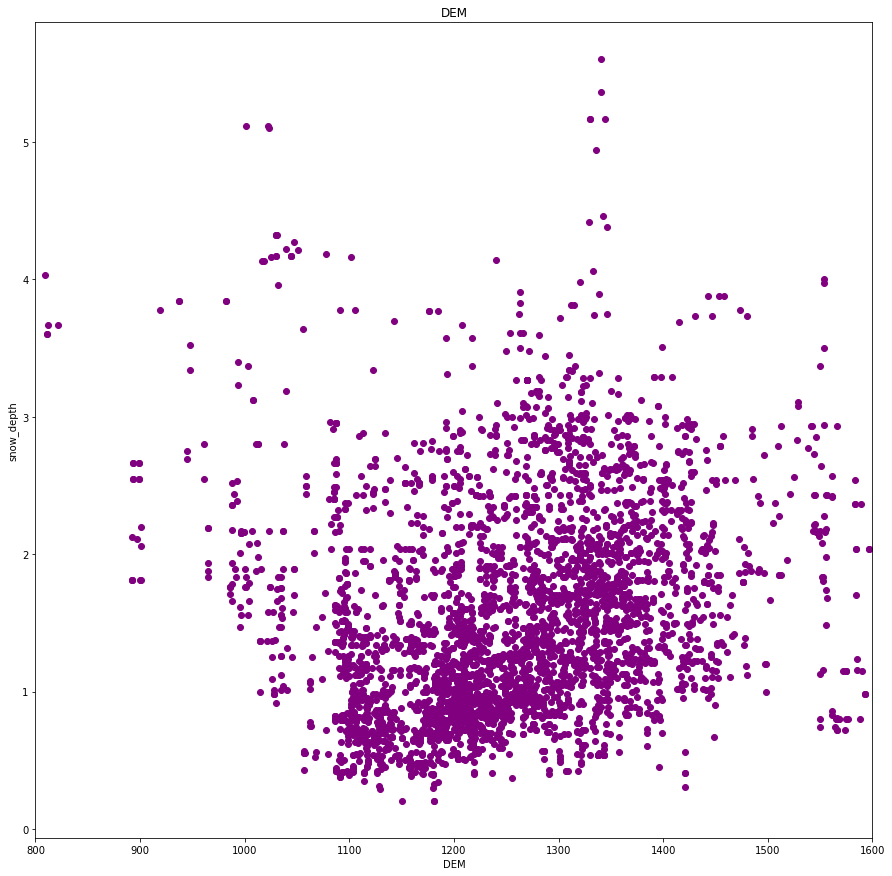

In [35]:
plt.figure(figsize=(15, 15))
plt.title('VH')
plt.xlabel('VH')
plt.ylabel('snow_depth')
#plt.xlim([-1, 5])
plt.scatter(df.VH, df.SD, color='blue');

plt.figure(figsize=(15, 15))
plt.title('VV')
plt.xlabel('VV')
plt.ylabel('snow_depth')
plt.scatter(df.VV, df.SD, color='red');
plt.xlim([-14, -2])

plt.figure(figsize=(15, 15))
plt.title('Ratio')
plt.xlabel('Ratio')
plt.ylabel('snow_depth')
plt.scatter(df.Ratio, df.SD, color='green');
plt.xlim([1, 3])

#plt.figure(figsize=(15, 15))
#plt.title('VH_Diff')
#plt.xlabel('VH_Diff')
#plt.ylabel('snow_depth')
#plt.scatter(df.VH_Diff, df.SD, color='orange');

plt.figure(figsize=(15, 15))
plt.title('Subtract')
plt.xlabel('Subtract')
plt.ylabel('snow_depth')
plt.scatter(df.Subtract, df.SD, color='turquoise');

plt.figure(figsize=(15, 15))
plt.title('DEM')
plt.xlabel('DEM')
plt.ylabel('snow_depth')
plt.scatter(df.DEM, df.SD, color='purple');
plt.xlim([800, 1600])

In [36]:
#df = df.replace(np.nan, 0)
#r2 = str(r2_score(df.Subtract, df.SD).round(2))
#print('R2 score is: ', r2)